## Tests for Detection module

In [1]:
# import modules
from nose.tools import *
from packages.detection import Detection
%matplotlib inline

# to reload recently edited modules
%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 740M (CNMeM is disabled)


In [2]:
detect = Detection()

In [3]:
x, y = detect.data_loader()

In [4]:
print x.shape, y.shape

(7705, 1, 32, 32) (7705,)


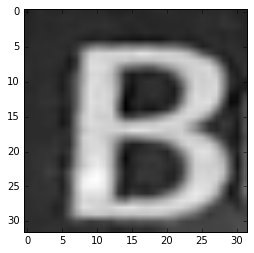

In [7]:
detect.visualize(x)

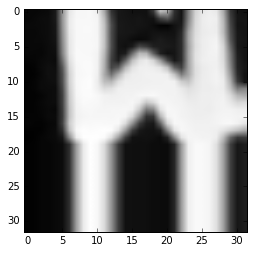

In [34]:
detect.visualize(detect.shiftup(x))

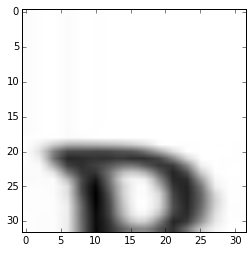

In [54]:
detect.visualize(detect.shiftdown(x))

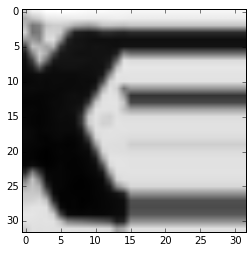

In [55]:
detect.visualize(detect.shiftleft(x))

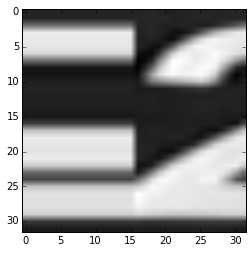

In [56]:
detect.visualize(detect.shiftright(x))

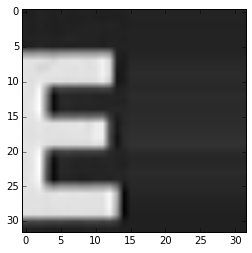

In [57]:
detect.visualize(detect.augment_creator(x)[0])

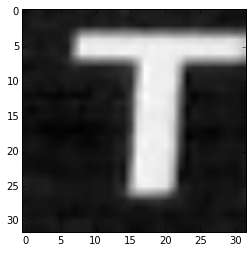

In [58]:
detect.visualize(detect.preprocess(x))

In [90]:
# testing for training
pos_x = detect.preprocess(x)
pos_y = y

neg_x, neg_y = detect.augment_creator(pos_x)

In [91]:
X, Y = detect.train_setter(pos_x, neg_x, pos_y, neg_y)

In [94]:
detect.net_setter()

In [101]:
detect.trainer(X, Y)

# Neural Network with 273794 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x32x32
  1  conv1     32x28x28
  2  pool1     32x14x14
  3  dropout1  32x14x14
  4  conv2     64x10x10
  5  pool2     64x5x5
  6  dropout2  64x5x5
  7  conv3     128x1x1
  8  hidden4   128
  9  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.47359       1.60987      0.29418      0.80737  29.73s
      2       0.82662       0.49044      1.68545      0.80737  34.90s
      3       0.53274       0.49344      1.07964      0.80737  29.44s
      4       0.53898       0.49368      1.09176      0.80737  29.41s
      5       0.53840       0.49356      1.09085      0.80737  29.41s
      6       0.53739       0.49344      1.08906      0.80737  29.41s
      7       0.53646       0.49337      1.08734      0.80737  29.41s
      8       0.53583       0.493

In [104]:
detect.train_saver('detection_tester.pkl')

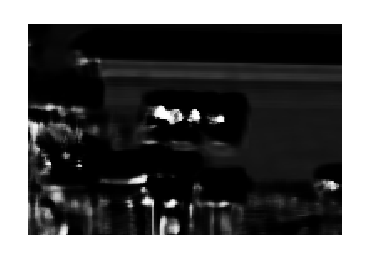

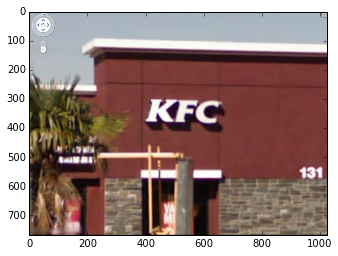

In [120]:
# predict tester
import numpy as np
from scipy.misc import imread, imresize
from sklearn.feature_extraction import image

img = imread('/home/faizy/workspace/project/project/datasets/svt/svt1/img/00_13.jpg')#[292:405, 391:664, :]
patches = image.extract_patches(img, (113, 90, 3), extraction_step = 5)

new_lst = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        new_lst.append(imresize(patches[i, j, 0, :, :, :], (32, 32)))

new_list = np.stack(new_lst)
new_list = new_list.dot([0.299, 0.587, 0.144])
tester = new_list.reshape(patches.shape[0]*patches.shape[1], 1, 32, 32)

tester /= tester.std(axis = None)
tester -= tester.mean()
tester = tester.astype('float32')

preder = detect.net.predict_proba(tester)

detect.generate_heatmap(img, preder, patches.shape[0], patches.shape[1])